In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver,TrapMetric
import networkx as nx
import torch
from torch import DoubleTensor as Tensor

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x155550ac4128>


In [2]:
base_input = '../../input_files/ap2_creation.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()

['default_assoc', 1.0]
['titration_time_int', 100]
Setting Titration End Point
['monomer_add_only', -1]
['A']
0.0
['M']
0.0
['B']
100.0
['S']
100.0
Parsing rule...
SPLIT_01:  ['null', 'A(a)']
GGGGGGGGGgg
Found Creation rxn
Parsing rule...
SPLIT_01:  ['null', 'M(a)']
GGGGGGGGGgg
Found Creation rxn
Parsing rule...
SPLIT_01:  ['A(a)+B(b)', 'A(a!1).B(a!1)']
['A', 'B', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['A(b)+M(a)', 'A(b!1).M(a!1)']
['A', 'M', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['A(c)+S(a)', 'A(c!1).S(a!1)']
['A', 'S', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['B(b)+M(b)', 'B(b!1).M(b!1)']
['B', 'M', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['B(c)+S(b)', 'M(c!1).S(b!1)']
['B', 'S', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['M(c)+S(b)', 'M(c!1).S(b!1)']
['M', 'S', '']
GGGGGGGGGgg
Node-1 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x1554bb7d76a0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (0, {'struct': <networkx.classes.graph.

Node-2 :  (1, {'struct': <networkx.classes.graph.Graph object at 0x1554bb7c8908>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 1})
-----
{'A', 'S'}
{'M'}
{'A', 'S'}
False
Orig edges:  [('A', 'S')]
Nextn edges:  []
Item edges:  [('A', 'S')]
Allowed edges: 
('null', 'A')
[False, True]
False
Allowed edges: 
('null', 'M')
[False, True]
False
Allowed edges: 
('A', 'B')
[True, False]
False
Allowed edges: 
('A', 'M')
[True, True]
False
############################3
Allowed edges: 
('A', 'S')
[True, True]
True
Allowed edges: 
('B', 'M')
[False, True]
False
Allowed edges: 
('B', 'S')
[False, True]
False
Allowed edges: 
('M', 'S')
[True, True]
False
############################3
[(10, {'struct': <networkx.classes.graph.Graph object at 0x1554bb4d24e0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})]
Connected item Edges:  [('A', 'S'), ('A', 'M'), ('S', 'M')]
$$$$$$$
Node-1 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x1554bb53e358>, 'copies': tensor([0.], d

{'M', 'A', 'S', 'B'}
{'S', 'B'}
{'A', 'M'}
Steric hindrance detected
Node-1 :  (14, {'struct': <networkx.classes.graph.Graph object at 0x1554bb4d2dd8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
Node-2 :  (12, {'struct': <networkx.classes.graph.Graph object at 0x1554bb4d2e80>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'M', 'A', 'S', 'B'}
{'A', 'S', 'B'}
{'M'}
Steric hindrance detected
Node-1 :  (14, {'struct': <networkx.classes.graph.Graph object at 0x1554bb4d2dd8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
Node-2 :  (13, {'struct': <networkx.classes.graph.Graph object at 0x155550050940>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'M', 'A', 'S', 'B'}
{'M', 'S', 'B'}
{'A'}
Steric hindrance detected
Node-1 :  (14, {'struct': <networkx.classes.graph.Graph object at 0x1554bb4d2dd8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
Node-2 :  (14, {'struct': <networkx.classes.graph.Graph ob

In [3]:
uid_dict = {}
react_dict = {}
sys.path.append("../../")
nodes_list = []
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    print(n,"--",gtostr(rn.network.nodes[n]['struct']))
    nodes_list.append(gtostr(rn.network.nodes[n]['struct']))
    for r_set in rn.get_reactant_sets(n):
        r_tup = tuple(list(r_set)+[n])
#         print(r_tup)
        data = rn.network.get_edge_data(r_tup[0], n)
        reaction_id = data['uid']
        react_dict[r_tup]=reaction_id
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = ("".join(r1),"".join(r2))
#         print(reactants)
        uid_dict[(n,k)] = uid
#         react_dict[reactants] = uid

print(uid_dict)
print(react_dict)

0 -- A
1 -- M
2 -- B
3 -- S
4 -- AM
5 -- AB
6 -- AS
7 -- BM
8 -- MS
9 -- ABM
10 -- AMS
11 -- BS
12 -- ABS
13 -- BMS
14 -- ABMS
{(0, 4): 0, (0, 5): 1, (0, 6): 2, (0, 9): 19, (0, 10): 20, (0, 12): 21, (0, 14): 24, (1, 4): 0, (1, 7): 3, (1, 8): 4, (1, 9): 5, (1, 10): 6, (1, 13): 22, (1, 14): 23, (2, 5): 1, (2, 7): 3, (2, 11): 7, (2, 9): 8, (2, 12): 9, (2, 13): 10, (2, 14): 11, (3, 6): 2, (3, 8): 4, (3, 11): 7, (3, 10): 12, (3, 12): 13, (3, 13): 14, (3, 14): 15, (4, 9): 8, (4, 10): 12, (4, 14): 16, (5, 9): 5, (5, 12): 13, (5, 14): 17, (6, 10): 6, (6, 12): 9, (6, 14): 18, (7, 13): 14, (7, 14): 18, (7, 9): 19, (8, 13): 10, (8, 14): 17, (8, 10): 20, (9, 14): 15, (10, 14): 11, (11, 14): 16, (11, 12): 21, (11, 13): 22, (12, 14): 23, (13, 14): 24}
{(0, 1, 4): 0, (0, 2, 5): 1, (0, 3, 6): 2, (1, 2, 7): 3, (1, 3, 8): 4, (1, 5, 9): 5, (2, 4, 9): 8, (0, 7, 9): 19, (3, 4, 10): 12, (1, 6, 10): 6, (8, 0, 10): 20, (2, 3, 11): 7, (3, 5, 12): 13, (0, 11, 12): 21, (2, 6, 12): 9, (8, 2, 13): 10, (3, 7, 13): 

In [4]:
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()
#new_kon = [0.2244, 0.2244, 0.2255, 1.6039, 1.6039, 1.6040] # M-1 s-1   
#new_kon = [0.0125, 0.1947, 0.0125, 3.6241, 3.4263, 3.4258] #Max yield Simruntime = 10sec
new_kon = new_kon + Tensor([1.]*np.array(1e0))
# new_kon[7]=1e-6
# new_kon = new_kon + Tensor([0.0158, 4.8523, 4.8524, 4.8517, 4.8521, 0.0122, 0.0122, 1.4120, 3.8928,
#         3.8763, 3.7180, 1.3986, 3.8942, 3.8792, 3.7292, 1.6763, 1.6764, 0.0111,
#         0.0111, 3.4412, 3.4471])
# new_kon = new_kon + Tensor([0.1500, 5.7619, 5.7887, 5.7685, 5.7934, 0.0162, 0.0171, 1.1242, 4.8607,
#                             4.8561, 6.4445, 1.1185, 4.8608, 4.8562, 6.4342, 0.4273, 0.4490, 0.0177,
#                             0.0169, 4.9485, 4.9159]) #5sec opti time

# new_kon = new_kon + Tensor([0.0101, 4.9091, 4.9091, 4.9049, 4.9044, 0.0146, 0.0145, 4.4233, 4.8614,
#         4.8579, 6.7328, 4.4090, 4.8596, 4.8564, 6.7438, 4.5641, 4.5641, 0.0164,
#         0.0163, 4.2838, 4.3043]) #1sec opti time
                            
# new_kon = new_kon + Tensor([0.01500, 0.016, 0.016, 0.016, 0.016, 1.0, 1.0, 1.0, 1.0,
#                             1.0, 10.0, 1.0, 1.0, 1.0, 10.0, 10.0, 10.0, 1.0,
#                             1.0, 10.0, 10.0])

# new_kon = new_kon + Tensor([4.8587, 4.9136, 4.8577, 4.9425, 4.8712, 0.0129, 0.0248, 4.9163, 0.0146,
#         0.0138, 0.0175, 7.2391, 0.0179, 0.0115, 0.0165, 7.8065, 7.1411, 7.1320,
#         7.1691, 0.0134, 0.0200, 0.0111, 0.0114, 7.7209, 7.8547])   #Optim rates with BS bond
update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]


nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')
# for edge in rn.network.edges:
#     print(rn.network.get_edge_data(edge[0],edge[1]))

# new_params = [36.289535, 95.123275]
# new_params = [33.170844 , 76.489304]
new_params = [36.289535, 85.123275]
# new_params=[10,10,10,10]
for n,data in rn.creation_rxn_data.items():
    data['k_on'] = new_params[n]

print("Creation Data: ")
print(rn.creation_rxn_data)

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 19}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 20}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 21}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 24}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 4}
{'k_on

In [5]:
optim_rates = [25,26]

vec_rn = VectorizedRxnNet(rn, dev='cpu',optim_rates=optim_rates)
vec_rn.reset()
# print(vec_rn.kon)
runtime =1e2
sim = VecSim(vec_rn, runtime, device='cpu')
y = sim.simulate(conc_scale=1e-2,conc_thresh=1e-2,mod_factor=10,mod_bool=True,verbose=True,change_cscale_tit=True)

A
Reactant Sets:
M
Reactant Sets:
B
Reactant Sets:
S
Reactant Sets:
AM
Reactant Sets:
(0, 1)
AB
Reactant Sets:
(0, 2)
AS
Reactant Sets:
(0, 3)
BM
Reactant Sets:
(1, 2)
MS
Reactant Sets:
(1, 3)
ABM
Reactant Sets:
(1, 5)
(2, 4)
(0, 7)
AMS
Reactant Sets:
(3, 4)
(1, 6)
(8, 0)
BS
Reactant Sets:
(2, 3)
ABS
Reactant Sets:
(3, 5)
(0, 11)
(2, 6)
BMS
Reactant Sets:
(8, 2)
(3, 7)
(1, 11)
ABMS
Reactant Sets:
(8, 5)
(6, 7)
(9, 3)
(1, 12)
(0, 13)
(11, 4)
(10, 2)
Before:  tensor([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  0., -1.,  1.,  0.,  1.,
          1.,  1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
         -0., -0., -0., -0.,  1.,  1.,  1., -0., -0.,  1., -1., -0.],
        [-1.,  0.,  0., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  1.,  1.,
         -0., -0.,  1.,  1.,  1.,  1., -0., -0., -0., -0., -0., -0., -0.,

In [6]:
print("t95 : ",y[-1])
print("Efficiency: ",(y[-1][-2]*torch.max(new_kon)*100))
times = []
for i in y[-1]:
    if i==-1:
        times.append(-1)
    else:
        times.append(i.item())
        
print("Times: ",times)

t95 :  (tensor(1.5035, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(2.5470, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(3.2598, dtype=torch.float64, grad_fn=<AddBackward0>), -1)
Efficiency:  tensor(325.9768, dtype=torch.float64, grad_fn=<MulBackward0>)
Times:  [1.5034705233114936, 2.5470032571645858, 3.259767780303256, -1]


<IPython.core.display.Javascript object>


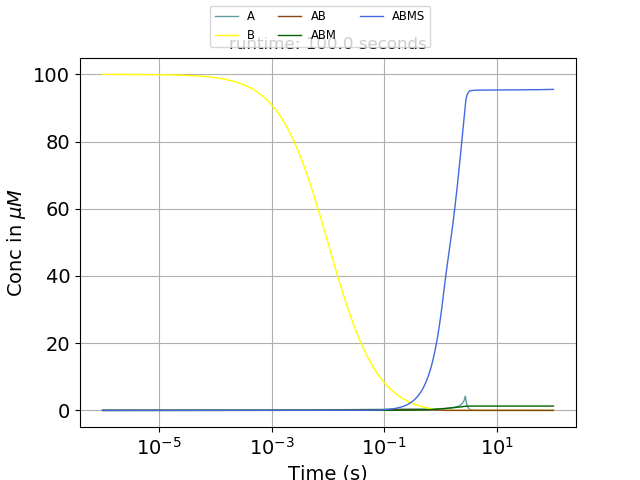

In [7]:
from matplotlib import pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
nodes_list = ['A','B','AB','ABM','ABMS']
# nodes_list_repeat = ['A','B','S','AB','AS','AA','BS','ABS','AAB','AAS','AABS']
sim.plot_observable(nodes_list, ax=ax,legend=False,seed=198)
ax.set_title("runtime: " + str(runtime) + " seconds")
handles,labels = ax.get_legend_handles_labels()
ax.set_xscale("log")
fig.legend(handles,nodes_list,loc='upper center',fancybox=True,ncol=3,fontsize='small',markerscale=1.0)
ax.grid(which="major",axis="both")

<IPython.core.display.Javascript object>


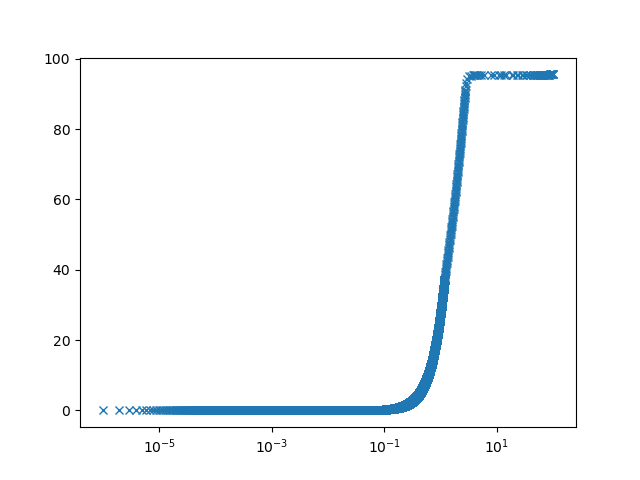

In [8]:
time_arr = np.array(sim.steps)
complx_conc = sim.observables[14][1]

fig,ax = plt.subplots()
ax.plot(sim.steps,complx_conc,linestyle='',marker='x')
ax.set_xscale("log")

In [9]:
def convert_time_interval(time,conc,time_int=0.1):
    start_time=time[0]
    time_array = []
    conc_array = []
    for i in range(len(time)):
        new_time=time[i]
        ts = new_time/start_time
        if ts>=time_int:
            time_array.append(time[i])
            conc_array.append(conc[i])
            start_time=new_time
    return(time_array,conc_array)

In [10]:
print(vec_rn.titration_time_map)

{25: 2.7556153585324252, 26: 1.174766830810962}


In [11]:
mod_time = vec_rn.titration_time_map[25]
# print(mod_time)



sel_time = (time_arr >= mod_time)
sel_indx = np.argwhere(sel_time)[0][0]


filter_time,filter_conc = convert_time_interval(time_arr[sel_indx-1:],complx_conc[sel_indx-1:],time_int=1.10)
final_time = np.concatenate((time_arr[:sel_indx],filter_time[:]))
final_conc = np.concatenate((complx_conc[:sel_indx],filter_conc[:]))

<IPython.core.display.Javascript object>


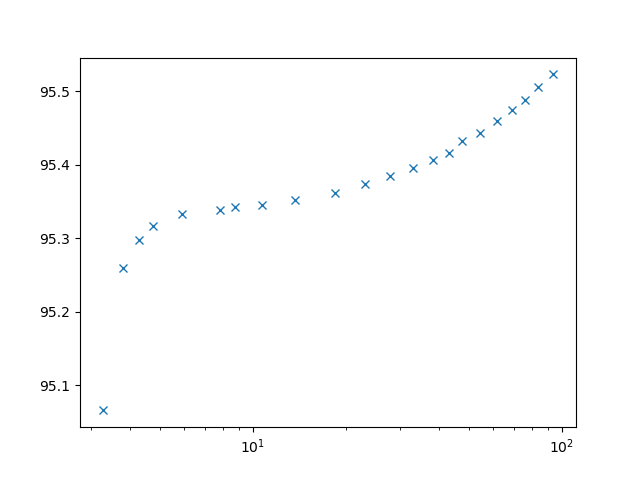

In [12]:
fig,ax = plt.subplots()
ax.plot(filter_time[:],filter_conc[:],linestyle='',marker='x')
ax.set_xscale("log")

<IPython.core.display.Javascript object>


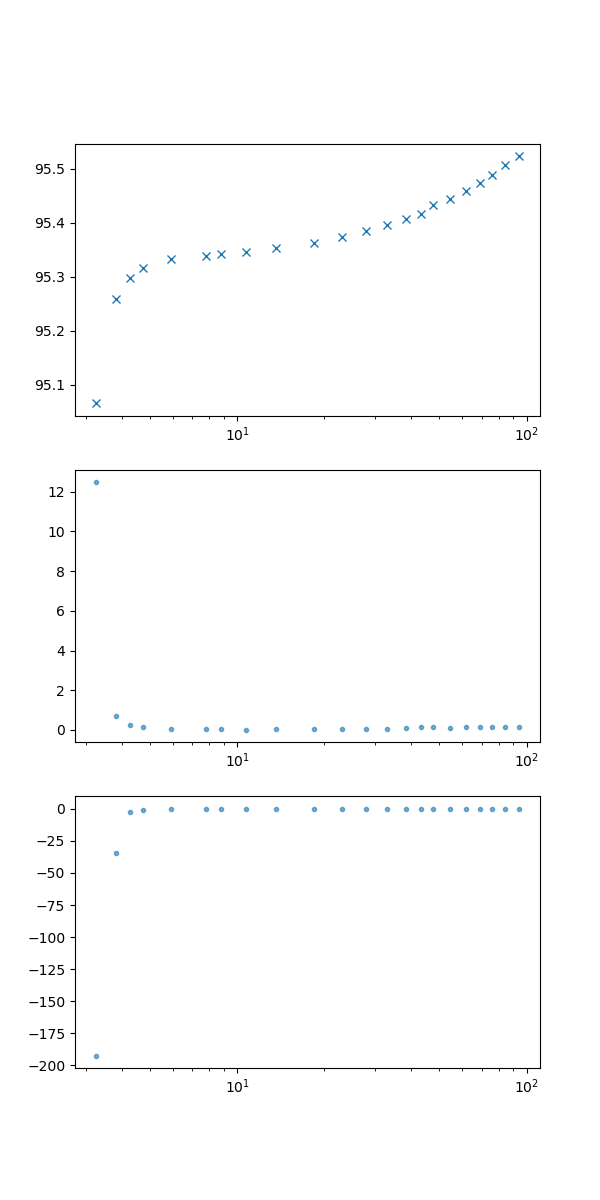

In [13]:
trap_met = TrapMetric(sim)

# lag,time_bounds = trap_met.calc_lag(np.array(sim.steps),np.array(sim.observables[14][1]),99.9)


mask = (final_time > mod_time)


fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(6,12))
ax1.plot(final_time[mask],final_conc[mask],linestyle='',marker='x')
# ax1.vlines(time_bounds[0],ymin=0,ymax=100,color='k',linestyle='--')
# ax1.vlines(time_bounds[1],ymin=0,ymax=100,color='r',linestyle='--')
# ax1.vlines(time_bounds[2],ymin=0,ymax=100,color='g',linestyle='--')
ax1.set_xscale("log")

#Clean Version GRAD1
clean_time1 = time_arr

# l_grad2_unclean = trap_met.calc_slope(clean_time1,l_grad,mode='log')
# clean_time2,l_grad2 = trap_met.clean_data(clean_time1,l_grad2_unclean,mode='hist')
# l_grad3 = trap_met.calc_slope(clean_time2,l_grad2,mode='log')
# mask = (clean_time < 183) & (clean_time>181)

#Uncleaned version - GRAD1
l_grad_unclean = trap_met.calc_slope(final_time,final_conc,mode='log')

#Clean Version - GRAD2
# clean_time2,l_grad2 = trap_met.clean_data(clean_time1,l_grad,mode='hist')

#Unclean Version - GRAD2
l_grad2_unclean = trap_met.calc_slope(final_time,l_grad_unclean,mode='log')

ax2.plot(final_time[mask],l_grad_unclean[mask],linestyle='',marker='.',alpha=0.6)
# ax2.plot(np.array(sim.steps)[:],np.degrees(np.arctan(l_grad[:])),linestyle='',marker='.',alpha=0.6)
# ax2.vlines(time_bounds[0],ymin=0,ymax=100,color='k',linestyle='--')
# ax2.vlines(time_bounds[1],ymin=0,ymax=100,color='r',linestyle='--')
# ax2.vlines(time_bounds[2],ymin=0,ymax=100,color='g',linestyle='--')
ax2.set_xscale("log")

ax3.plot(final_time[mask],l_grad2_unclean[mask],linestyle='',marker='.',alpha=0.6)
# ax3.vlines(time_bounds[0],ymin=0,ymax=10,color='k',linestyle='--')
# ax3.vlines(time_bounds[1],ymin=0,ymax=10,color='r',linestyle='--')
# ax3.vlines(time_bounds[2],ymin=0,ymax=10,color='g',linestyle='--')
ax3.set_xscale("log")



[13437  1763  1310  1090   954   859   788   733   689   651   620   592
   569   549   530   514   500   487   475   465   456   447   440   433
   428   423   419   417   414   415   415   417   428   441   447   461
   486   525   595   763   894     3     4     5     4     6     6     7
     9    20]


<IPython.core.display.Javascript object>


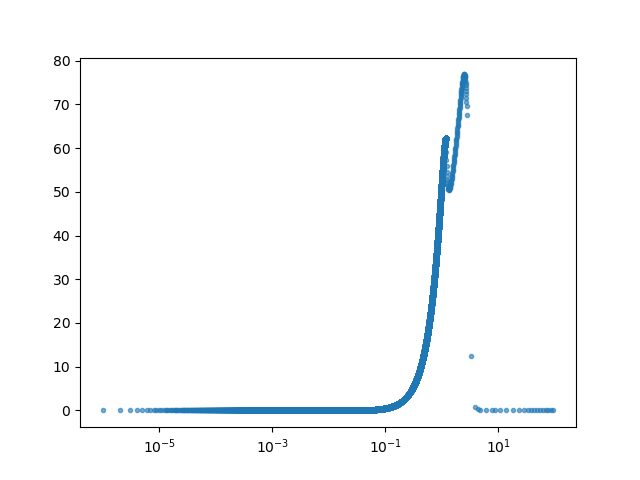

In [14]:
#Analysing GRAD1

l_grad_unclean = trap_met.calc_slope(final_time,final_conc,mode='log')
# step_size=[]
# for i in range(len(time_arr)-1):
#     delta = time_arr[i+1]-time_arr[i]
#     step_size.append(delta)
# remove_indx = []
# for i in range(len(step_size)-1):
#     delta = step_size[i+1]-step_size[i]
#     if delta < 0:
#         remove_indx.append(i)
# mask_bool = np.ones((len(time_arr)),dtype='bool')
# for i in range(len(remove_indx)):
#     mask_bool[remove_indx[i]:remove_indx[i]+1]=False
# clean_time1 = time_arr[mask_bool]
# l_grad = l_grad_unclean[mask_bool]

# clean_time1,l_grad=trap_met.clean_data(final_time,l_grad_unclean,mode='hist')

def clean_data(time,l_grad,thresh_freq=1,bin_num=50):
    data=np.histogram(l_grad,bins=bin_num)
    print(data[0])
    # print(data)
    flag=False
    count=0
    bin_val_min=0
    bin_val_max=0
    for i in range(len(data[0])):
        if data[0][i] >=10 and not flag:
            flag=True
            count+=1
            bin_val_min = data[1][i]
        elif data[0][i] <=1 and flag:
            count+=1
            bin_val_max=data[1][i]
            break

    mask_out = (l_grad <= bin_val_max) & (l_grad >= bin_val_min)
    new_time = np.array(time)[mask_out]
    l_grad_new = l_grad[mask_out]

    return(new_time,l_grad_new)

clean_time1,l_grad = clean_data(final_time,l_grad_unclean)
fig,ax2 = plt.subplots()

ax2.plot(final_time,l_grad_unclean,linestyle='',marker='.',alpha=0.6)
ax2.set_xscale("log")



In [15]:
actual_l_grad = l_grad_unclean
actual_time = final_time

#Finding time points by just visual picking
first_peak_mask = actual_time<1e4
first_peak_indx = np.argmax(actual_l_grad[first_peak_mask])
first_peak = actual_time[first_peak_mask][first_peak_indx]

second_regime_mask = (actual_time>1e3)
second_peak_indx = np.argmax(actual_l_grad[second_regime_mask])
second_peak = actual_time[second_regime_mask][second_peak_indx]

# third_regime_mask = (actual_time>1e6)
# third_peak_indx = np.argmax(actual_l_grad[third_regime_mask])
# third_peak = actual_time[third_regime_mask][third_peak_indx]

# time_bounds = [first_peak,second_peak,third_peak]
time_bounds = [first_peak,second_peak]



ValueError: attempt to get argmax of an empty sequence

In [ ]:
print(time_bounds)
lag_time = np.log(time_bounds[1]/time_bounds[0])
print("Lag Factor: ",lag_time)

In [ ]:
fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(6,12))
ax1.plot(final_time,final_conc,linestyle='',marker='x')
ax1.vlines(time_bounds[0],ymin=0,ymax=100,color='k',linestyle='--')
ax1.vlines(time_bounds[1],ymin=0,ymax=100,color='r',linestyle='--')
# ax1.vlines(time_bounds[2],ymin=0,ymax=100,color='g',linestyle='--')
ax1.set_xscale("log")
# ax1.set_xlim(left=1e3,right=1e5)
ax2.plot(final_time[mask],l_grad_unclean[mask],linestyle='',marker='.',alpha=0.6)
ax2.vlines(time_bounds[0],ymin=0,ymax=20,color='k',linestyle='--')
ax2.vlines(time_bounds[1],ymin=0,ymax=20,color='r',linestyle='--')
# ax2.vlines(time_bounds[2],ymin=0,ymax=20,color='g',linestyle='--')
ax2.set_xscale("log")
# ax2.set_xlim(left=1e3,right=1e5)
# ax3.plot(clean_time2[:],l_grad2_new[:],linestyle='',marker='.',alpha=0.6)
# ax3.vlines(time_bounds[0],ymin=0,ymax=10,color='k',linestyle='--')
# ax3.vlines(time_bounds[1],ymin=0,ymax=10,color='r',linestyle='--')
# # ax3.vlines(time_bounds[2],ymin=0,ymax=10,color='g',linestyle='--')
# ax3.set_xscale("log")
# ax3.set_xlim(left=1e3,right=1e5)

In [ ]:
print(vec_rn.copies_vec)
print("Unused AMount: ",y[1])

In [ ]:
#Calculating chemical potential and fluxes
#Calculating correlation b/w fluxes
def corr_matrix(M):
    return(np.corrcoef(M))


flux_corr_matrix = corr_matrix(np.transpose(sim.uid_flux.detach().numpy()))
# print(np.transpose(sim.uid_flux.detach().numpy()))

%matplotlib notebook
fig_c,ax_c = plt.subplots(figsize=(12,12))
hm = ax_c.imshow(flux_corr_matrix)


fw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'+'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
rw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'-'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
ax_labels = fw_labels+rw_labels
ax_c.set_xticks(np.arange(len(ax_labels)))
ax_c.set_yticks(np.arange(len(ax_labels)))
ax_c.set_xticklabels(ax_labels)
ax_c.set_yticklabels(ax_labels)
plt.setp(ax_c.get_xticklabels(),rotation=90, ha='center',fontsize=10,va='top')
plt.setp(ax_c.get_yticklabels(),va='center',fontsize=10)
fig_c.colorbar(hm,ax=ax_c,aspect=40,label="Corr Coeff",orientation='horizontal',panchor=(0.5,0.0),pad=0.2,shrink=0.5)
# ax_c.grid()

for i in range(len(ax_labels)):
    for j in range(len(ax_labels)):
#         print(ax_labels[j],ax_labels[i])
        ax.text(1.0,1.0,flux_corr_matrix[i,j],ha="center", va="center", color="w",transform=ax.transAxes)
fig.tight_layout()
plt.show()
label = "Reaction Fluxes"
ax_c.set_title(label)

In [ ]:
# import pickle
# import os
# pick_path = "./correlation_matrix_reference.pickle"
# ref_corr_matrix=np.zeros((2,2))
# if os.path.exists(pick_path):
#     with open(pick_path,'rb') as pick_handle:
#         ref_corr_matrix = pickle.load(pick_handle)
# else:
#     with open(pick_path,"wb") as pick_handle2:
#         pickle.dump(flux_corr_matrix,pick_handle2)

# if ref_corr_matrix.all() !=0:
#     diff_matrix = flux_corr_matrix-ref_corr_matrix
#     fig_diff,ax_diff = plt.subplots(figsize=(12,12))
#     hm = ax_diff.imshow(diff_matrix)
    
#     fw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'+'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
#     rw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'-'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
#     ax_labels = fw_labels+rw_labels
#     ax_diff.set_xticks(np.arange(len(ax_labels)))
#     ax_diff.set_yticks(np.arange(len(ax_labels)))
#     ax_diff.set_xticklabels(ax_labels)
#     ax_diff.set_yticklabels(ax_labels)
#     plt.setp(ax_diff.get_xticklabels(),rotation=90, ha='center',fontsize=10,va='top')
#     plt.setp(ax_diff.get_yticklabels(),va='center',fontsize=10)
#     fig_diff.colorbar(hm,ax=ax_diff,aspect=40,label="Corr Coeff",orientation='horizontal',panchor=(0.5,0.0),pad=0.2,shrink=0.5)

In [ ]:
flux_data=sim.uid_flux.detach().numpy()[:-1,:]

In [ ]:
#Calculate lag between diff fluxes
from scipy import signal
def calc_lag(x,y):
    corr_array = signal.correlate(x,y,mode='full')
#     lags = signal.correlation_lags(x.size, y.size, mode="full")
#     lag = lags[np.argmax(corr_array)]
#     np_corr_array = np.correlate(x,y,mode='full')
    lag1 = np.argmax(corr_array)-np.floor(corr_array.shape[0]/2)
    corr_coeff = np.corrcoef(x,y,rowvar=False)
    
#     print(corr_array)
#     print(np_corr_array)
#     print(corr_coeff)
#     print("Lag time: ",lag1)
    return(lag1)
    

lag_matrix = np.zeros((flux_data.shape[1],flux_data.shape[1]))
# coeff_matrix = np.zeros(flux_data.shape)
for i in range(flux_data.shape[1]):
    x=flux_data[:,i]
    for j in range(flux_data.shape[1]):
        y=flux_data[:,j]
        lag_matrix[i,j]=calc_lag(x,y)
        

fig_l,ax_l = plt.subplots(figsize=(12,12))
hm = ax_l.imshow(lag_matrix,cmap='inferno')
# fw_labels=list(react_dict.values())
# rw_labels=['-'+str(l) for l in fw_labels]
# ax_labels = fw_labels+rw_labels
fw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'+'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
rw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'-'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
ax_labels = fw_labels+rw_labels
ax_l.set_xticks(np.arange(len(ax_labels)))
ax_l.set_yticks(np.arange(len(ax_labels)))
ax_l.set_xticklabels(ax_labels)
ax_l.set_yticklabels(ax_labels)
plt.setp(ax_l.get_xticklabels(),rotation=90, ha='center',fontsize=10,va='top')
plt.setp(ax_l.get_yticklabels(),va='center',fontsize=10)
fig_l.colorbar(hm,ax=ax_l,aspect=40,label="Corr Coeff",orientation='horizontal',pad=0.07,shrink=0.5)
fig_l.tight_layout()
    

In [ ]:
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        kon_max = -1
        next_node = -1

        kon_sum = 0
        total_flux_outedges = 0
        total_flux_inedges = 0
        if len(edges)==0:
            return(False)
            
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
             
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

        
def get_node_flux(n):
    total_flux_outedges = 0
    total_flux_inedges = 0
    #Go over all the out edges
    edges_out = rn.network.out_edges(n)
    if len(edges_out)>0:

        for edge in edges_out:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]

            #Calculate k_off also
            std_c = Tensor([1e6])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Getting conc. of reactants and products
            #Get product
            prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

            #Net flux from this edge = Generation - consumption
            edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
            #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

            print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
            print("Net flux: ",edge_flux)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Reaction data OUTWARD: ")
            print(data)

            total_flux_outedges+=edge_flux
    
    #Now go over all the in edges
    edges_in = rn.network.in_edges(n)
    react_list = []
    if len(edges_in) > 0:
        for edge in edges_in:
            if edge[0] in react_list:
                continue
            data = rn.network.get_edge_data(edge[0],edge[1])
            uid = data['uid']


            #Get generation rates; which would be kon
            temp_kon = vec_rn.kon[uid]

            #Get consumption rates; which is k_off
            std_c = Tensor([1e6])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Get conc. of reactants and products
            prod = gtostr(rn.network.nodes[edge[1]]['struct'])
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
            react_list.append(node_map[react])
            #Net flux from this edge = Generation - consumption
            edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
            #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


            print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
            print("Net flux: ",edge_flux_in)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Raction data INWARD: ")
            print(data)

            total_flux_inedges+=edge_flux_in
    net_node_flux = total_flux_outedges + total_flux_inedges
    
    return(net_node_flux)
    
pathway = []
kon_sumarray = []
total_con_rate = {}
net_flux = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")
    print("|                                                                             |")
    node_flux = get_node_flux(n)
    net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
    print("|                                                                             |")
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")

print(pathway)
print(kon_sumarray)

#print(total_con_rate)

In [ ]:
# for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#     print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

In [ ]:
# for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#     print(k," : ", v.item())

In [ ]:
import networkx as nx
labels = nx.get_node_attributes(rn.network, 'struct')
labels = {key:gtostr(labels[key]) for key in labels.keys()}
# nx.draw_networkx(rn.network,labels=labels,node_size=1000)

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
sl_pos = nx.shell_layout(rn.network)
nx.draw_networkx(rn.network,pos=sl_pos,labels=labels,node_size=1000,node_color='indianred',ax=ax,edgelist=[])
# new_kon = 0.5*np.array([0.8179, 0.8172, 0.8174, 0.8174, 0.8218, 0.0296, 0.0295, 4.6052, 0.8188,
#         0.8188, 7.7299, 5.4280, 0.8199, 0.8183, 7.1332, 4.9835, 4.9838, 0.0307,
#         0.0315, 5.2260, 5.2278])

if vec_rn.rxn_coupling:
    label_kon = 0.5*sim.coupled_kon.detach().numpy()
else:
    label_kon = 0.5*vec_rn.kon.detach().numpy()
    
sample_colors = ['black','black','black','black','olivedrab','orchid','darkorange','teal','']
edge_widths = []
edge_colors= []
for edge,uid in uid_dict.items():
    edge_widths.append(label_kon[uid])
    #edge_colors.append(sample_colors[uid])
nx.draw_networkx_edges(rn.network,pos=sl_pos,width=edge_widths,label=edge_widths,arrowsize=10,min_target_margin=15.0)


In [ ]:
# fig,ax = plt.subplots(figsize=(6,6))
# nx.draw_networkx(rn.network,pos=sl_pos,labels=labels,node_size=1000,node_color='indianred',ax=ax)

In [ ]:























































































poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

